---

## Finding the best Classifier

---

$\color{pink}{\text{Classification}}$ is the process of predicting the class of given data points. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y). 

There is a lot of classification algorithms but it is not possible to conclude which one is superior to other. It depends on the application and nature of available data set. In the following section we test some of the known machine learning algorithms for classifiaction in other to determine which one has the best performance in our case.

$\color{pink}{\text{Before testing work}}$

- Import the necessary libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


- Import dataset

In [57]:
filename = "dataframes/bands_lin.csv"
df = pd.read_csv(filename)
df.head()

,file,animal,band0,band1,band2,band3,band4,band5,band6,band7,...,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24
0,audio-dataset/cats_dogs/cat_74.wav,1,-8.027532,-8.557745,-7.066034,-11.007767,-2.205326,-2.614854,-9.251714,-7.110344,...,-27.856952,-24.824903,-45.901381,-50.192669,-50.192669,-50.192669,-50.192669,-50.192669,-50.192669,-50.192669
1,audio-dataset/cats_dogs/dog_barking_63.wav,0,-20.834045,-6.203216,-13.831171,-19.378827,-28.767850,-27.528727,-26.376291,-39.701635,...,-37.618089,-40.776983,-42.116020,-42.455536,-42.455536,-42.455536,-42.455536,-42.455536,-42.455536,-42.455536
2,audio-dataset/cats_dogs/cat_60.wav,1,5.145155,-10.034791,-5.291555,-21.877704,-26.527866,-33.613935,-36.843166,-37.880773,...,-38.120739,-38.381084,-38.824154,-38.824154,-38.824154,-38.824154,-38.824154,-38.824154,-38.824154,-38.824154
3,audio-dataset/cats_dogs/dog_barking_77.wav,0,-8.327550,2.926731,-4.832696,-8.023895,-18.158772,-20.334925,-23.755830,-29.417344,...,-34.919730,-36.878413,-40.819096,-41.520092,-41.520092,-41.520092,-41.520092,-41.520092,-41.520092,-41.520092
4,audio-dataset/cats_dogs/cat_48.wav,1,-23.275580,-11.968597,-4.606911,-2.391914,-11.736590,-31.441037,-37.686748,-37.171268,...,-38.690999,-39.411448,-40.018420,-40.019665,-40.019665,-40.019665,-40.019665,-40.019665,-40.019665,-40.019665


Histogram plot:

<AxesSubplot:>

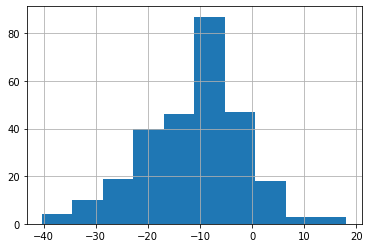

In [58]:
df["band0"].hist()

- Declare feature vector and target vector.

In [59]:
X = df.drop(columns=['animal','file'], axis=1) 
y = df['animal']

- Split data into into separate training and test sets.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=0)

- Feature scaling

In [61]:
from sklearn.preprocessing import RobustScaler

cols = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,band0,band1,band2,band3,band4,band5,band6,band7,band8,band9,...,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24
0,-0.517501,-1.074493,-1.471011,-1.412433,-0.429146,-0.371495,-0.455460,-0.039489,-0.062794,0.087273,...,-0.197846,-0.355584,-1.551445,-1.326507,-1.326507,-1.326507,-1.326507,-1.326507,-1.326507,-1.326507
1,0.186857,-1.075348,0.259667,-1.007776,-0.332961,0.299448,-0.799661,0.267140,0.276694,-0.229793,...,0.225778,0.004451,-0.228451,-0.140907,-0.140907,-0.140907,-0.140907,-0.140907,-0.140907,-0.140907
2,-0.962868,-0.000314,-0.412355,-0.635843,-0.116231,-0.782815,-0.475533,-0.446369,-0.754770,-0.857159,...,-0.717349,-0.594625,-0.122796,-0.074152,-0.074152,-0.074152,-0.074152,-0.074152,-0.074152,-0.074152
3,-0.093348,0.415858,-0.025828,-0.399444,-0.255923,-0.469192,-0.296499,-0.566653,-0.466237,-0.200674,...,-0.526802,-0.358423,0.527121,0.518003,0.518003,0.518003,0.518003,0.518003,0.518003,0.518003
4,0.430474,-0.073263,-0.172135,-0.348431,0.385860,0.548866,0.620698,0.595613,0.522958,0.439626,...,0.561450,0.728608,0.249934,0.148554,0.148106,0.147822,0.147627,0.147493,0.147408,0.147366


---

## Support vector machine (SVM)

---

### $\color{pink}{\text{(1) Basic notions}}$

- A support vector machine (SVM) is a supervised machine learning model that can be used for both classification or regression challenges. 

- This algorithm works by mapping data to a high-dimensional **feature space** so that data points can be categorized, even when the data are not otherwise linearly separable. Then, it performs classification by finding the hyper-plane that differentiates the two classes very well (decision boundary).

- Support vectors: data points that define the margin (empty space between classes). The decision boundary depends on this data points.

- Maximal margine: The solution maximizes the margin between the classes.

<center><img src="svm.png" width="500" height="340"></center>

### $\color{pink}{\text{(3) Code}}$

In [84]:
from sklearn import svm

cls= svm.SVC(kernel='linear')
cls.fit(X_train, y_train)

SVC(kernel='linear')

In [85]:
cls.score(X_test, y_test)

0.8828828828828829

In [86]:
from sklearn.model_selection import GridSearchCV 

parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10]} # Checking only three possible values for the C parameter
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

print("The best parameters are {} with a score of {:0.2f}".format(clf.best_params_, clf.best_score_))


The best parameters are {'C': 0.1, 'kernel': 'linear'} with a score of 0.86


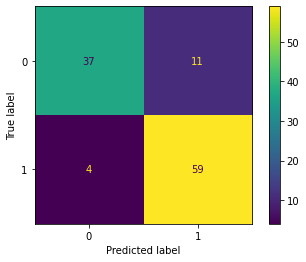

In [91]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [88]:
from sklearn.metrics import classification_report

grid_predictions = clf.predict(X_test)

# print classification report

print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        48
           1       0.84      0.94      0.89        63

    accuracy                           0.86       111
   macro avg       0.87      0.85      0.86       111
weighted avg       0.87      0.86      0.86       111



---

## k-NN (k-nearest neighbours) 

---

### $\color{pink}{\text{(1) Basic notions}}$

K-NN is a supervised machine learning model that can be used for both classification or regression challenges. This algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

K-NN tries to predict the correct class for the test data by calculating the distance between the test data and all the training points. Then select the K number of points which is closet to the test data. The KNN algorithm calculates the probability of the test data belonging to the classes of ‘K’ training data and class holds the highest probability will be selected.

### $\color{pink}{\text{(3) Code}}$

For this project, we tested K-NN algorithm with different numbers of neighbours (K) to check which of them had the best performance while applied to our data. The results were as follows:

In [92]:
from sklearn.neighbors import KNeighborsClassifier

for n_neighbors in [1,5,10,15,20,25]:

    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X_train, y_train)

    print("Number of Neighbors:", str(n_neighbors))
    print("The accuracy:", clf.score(X_test, y_test))

Number of Neighbors: 1
The accuracy: 0.8288288288288288
Number of Neighbors: 5
The accuracy: 0.8108108108108109
Number of Neighbors: 10
The accuracy: 0.8468468468468469
Number of Neighbors: 15
The accuracy: 0.8108108108108109
Number of Neighbors: 20
The accuracy: 0.8108108108108109
Number of Neighbors: 25
The accuracy: 0.8108108108108109


**Observation:** (Data overfits-underfits with some k)

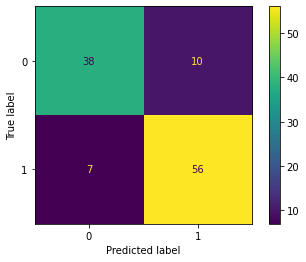

In [93]:
clf = KNeighborsClassifier(10) #We select K=10, the highest accuracy
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

---

## Naïve Bayes Classification

---

### $\color{pink}{\text{(1) Basic notions}}$


**Naïve Bayes** algorithm is simple but powerful supervised learning algorithm, which is based on **Bayes theorem** and used for solving classification problems.

- Bayes Theorem

Given an hypothesis H and evidence E, **Bayes' theorem** states that the relationship between the probability of the hypothesis before getting the evidence P(E) and the probability of the hypothesis after getting the evidence P(H|E) is:


$$ P(H|E) = \frac{P(E|H)P(H)}{P(E)} $$ 

$\color{purple}{\text{P(H|E)}}$ → **Posterior:** How probable is the hypothesis, given the observed evidence?

$\color{lightblue}{\text{P(E|H)}}$ → **Likelihood:** How probable is the evidence, given that the hypothesis is true?

$\color{pink}{\text{P(H)}}$ → **Prior:** How probable was the hypothesis before observing the evidence?

$\color{lightgreen}{\text{P(E)}}$ → **Marginal:** How probable is the evidence under all possible hypothesis?

- Naïve Bayes


### $\color{pink}{\text{(2) Dealing with not-categorical data}}$
### $\color{pink}{\text{(3) Code}}$


In [44]:
df= df.drop(columns=["band17","band18","band19","band20","band21","band22","band23","band24"],axis=1)
df

,file,animal,band0,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16
0,audio-dataset/cats_dogs/cat_74.wav,1,-8.027532,-8.557745,-7.066034,-11.007767,-2.205326,-2.614854,-9.251714,-7.110344,-8.946160,-10.896615,-12.600976,-14.916975,-22.190639,-21.332321,-20.284641,-27.856952,-24.824903
1,audio-dataset/cats_dogs/dog_barking_63.wav,0,-20.834045,-6.203216,-13.831171,-19.378827,-28.767850,-27.528727,-26.376291,-39.701635,-37.309565,-31.886871,-41.027158,-41.940245,-41.982228,-41.317457,-40.525598,-37.618089,-40.776983
2,audio-dataset/cats_dogs/cat_60.wav,1,5.145155,-10.034791,-5.291555,-21.877704,-26.527866,-33.613935,-36.843166,-37.880773,-38.437410,-37.384623,-38.447517,-38.404807,-38.568222,-38.461846,-38.531906,-38.120739,-38.381084
3,audio-dataset/cats_dogs/dog_barking_77.wav,0,-8.327550,2.926731,-4.832696,-8.023895,-18.158772,-20.334925,-23.755830,-29.417344,-31.932162,-36.763530,-36.026504,-37.152072,-38.143720,-38.210977,-37.051233,-34.919730,-36.878413
4,audio-dataset/cats_dogs/cat_48.wav,1,-23.275580,-11.968597,-4.606911,-2.391914,-11.736590,-31.441037,-37.686748,-37.171268,-36.058120,-38.557018,-39.678772,-39.061985,-35.711999,-35.932623,-36.712246,-38.690999,-39.411448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,audio-dataset/cats_dogs/cat_45.wav,1,-3.274261,-1.900801,-1.007239,-13.110084,-19.979620,-21.519866,-23.519776,-24.504801,-24.997344,-25.143795,-25.838441,-26.251958,-26.773809,-27.436457,-27.640470,-28.528036,-33.609776
273,audio-dataset/cats_dogs/dog_barking_46.wav,0,1.775634,6.786114,3.640546,-0.337700,-20.445734,-21.382854,-22.947589,-38.420302,-32.929842,-24.716649,-37.422100,-40.519427,-40.640547,-40.589703,-40.540284,-35.876183,-39.434503
274,audio-dataset/cats_dogs/cat_51.wav,1,-12.845788,-15.284251,-17.085772,-19.073413,-19.474678,-20.127786,-20.905711,-22.230142,-22.970111,-23.635497,-24.505831,-25.066661,-25.605975,-26.847070,-26.743466,-27.164983,-30.427653
275,audio-dataset/cats_dogs/cat_79.wav,1,-33.182150,-23.819263,-20.925602,-17.751063,-13.411401,-21.698929,-23.499661,-25.303056,-29.097833,-31.216881,-31.632739,-33.827832,-32.933016,-30.852936,-33.946664,-35.553580,-38.358552


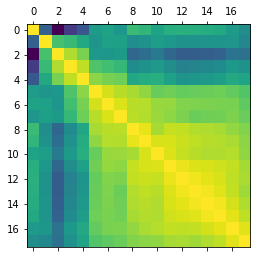

In [45]:
plt.matshow(df.corr())
plt.show()

Some plots:

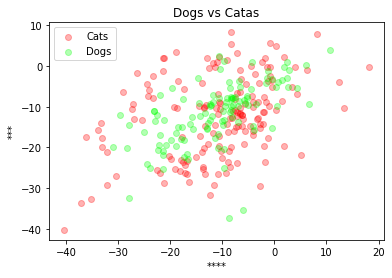

In [48]:
D = df[df['animal'] == 0]
C = df[df['animal'] == 1]

plt.title("Dogs vs Catas")
plt.xlabel("****")
plt.ylabel("***")
plt.scatter(C.band0, C.band3, color = "red", label = "Cats",alpha = 0.3)
plt.scatter(D.band0,D.band3, color = "lime", label = "Dogs",alpha = 0.3)
plt.legend()
plt.show()

- Model training

In [79]:
model = GaussianNB()
model.fit(X_train,y_train)

print("Accuracy obtained:", model.score(X_test, y_test))

"""
The cross_val_score() function will be used to perform the evaluation, 
taking the dataset and cross-validation configuration and returning a list 
of scores calculated for each fold.
"""

cross_val_score(model, X, y, cv=8)

Accuracy obtained: 0.7657657657657657


array([0.71428571, 0.74285714, 0.74285714, 0.8       , 0.77142857,
       0.76470588, 0.82352941, 0.73529412])

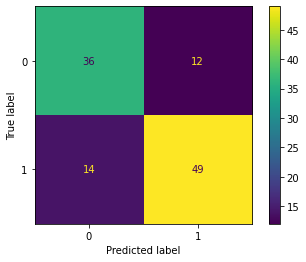

In [78]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [81]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73        48
           1       0.80      0.78      0.79        63

    accuracy                           0.77       111
   macro avg       0.76      0.76      0.76       111
weighted avg       0.77      0.77      0.77       111



---

## Gaussian Mixture Models (GMMs)

----